<a href="https://colab.research.google.com/github/TatySCV/DataScience/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REGRESIÓN LINEAL**

Ejecuta el siguiente código en una celda para instalar las bibliotecas pandas, matplotlib y scikit-learn

In [ ]:
!pip install pandas matplotlib scikit-learn

Carga el archivo en el entorno de Google Colab

In [ ]:
import pandas as pd

# Cargar datos
df = pd.read_csv('/content/retail_solutions_data.csv')

# Ver las primeras filas del dataset
df.head()

,BranchID,BranchName,Region,City,MonthlySales,MonthlyCosts,Employees,CustomerSatisfaction,MonthlyVisitors
0,1,Sucursal D,Valparaíso,Valparaíso,"16,273,483.90","10,222,710.34",13,3.70,7595
1,2,Sucursal A,Región Metropolitana,Maipú,"15,673,728.55","10,939,110.14",13,3.70,2720
2,3,Sucursal A,Araucanía,Villarrica,"8,055,368.53","5,309,138.04",30,4.30,7773
3,4,Sucursal C,Valparaíso,Quilpué,"38,629,163.00","28,549,918.25",18,3.50,9903
4,5,Sucursal E,Región Metropolitana,Maipú,"29,697,899.46","24,830,148.16",18,3.00,2672


Realizar la Regresión Lineal

In [ ]:

# Asegurarse de que los valores de las columnas no sean excesivamente grandes o erróneos
# Definir las características (X) y la variable objetivo (y)
X = df[['MonthlyVisitors', 'Employees', 'CustomerSatisfaction']]  # Variables predictoras
y = df['MonthlySales']  # Variable objetivo

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar las predicciones
df['PredictedSales'] = model.predict(X)

# Asegurarse de que las predicciones no estén en notación científica
pd.options.display.float_format = '{:,.2f}'.format  # Formato sin notación científica

df.head(10)

,BranchID,BranchName,Region,City,MonthlySales,MonthlyCosts,Employees,CustomerSatisfaction,MonthlyVisitors,PredictedSales
0,1,Sucursal D,Valparaíso,Valparaíso,16.27,"10,222,710.34",13,3.70,7595,28.18
1,2,Sucursal A,Región Metropolitana,Maipú,15.67,"10,939,110.14",13,3.70,2720,27.31
2,3,Sucursal A,Araucanía,Villarrica,8.06,"5,309,138.04",30,4.30,7773,26.04
3,4,Sucursal C,Valparaíso,Quilpué,38.63,"28,549,918.25",18,3.50,9903,28.06
4,5,Sucursal E,Región Metropolitana,Maipú,29.70,"24,830,148.16",18,3.00,2672,26.92
5,6,Sucursal D,Los Lagos,Castro,33.58,"25,649,938.00",11,2.60,7567,28.73
6,7,Sucursal A,Los Lagos,Osorno,14.90,"9,490,885.85",16,4.50,8685,27.79
7,8,Sucursal C,Región Metropolitana,Puente Alto,5.02,"3,672,310.08",20,3.10,7937,27.59
8,9,Sucursal E,Araucanía,Villarrica,48.41,"37,707,796.60",16,4.80,2413,26.58
9,10,Sucursal D,Región Metropolitana,Maipú,49.37,"39,193,063.12",26,2.80,6718,26.76


Visualización de resultados

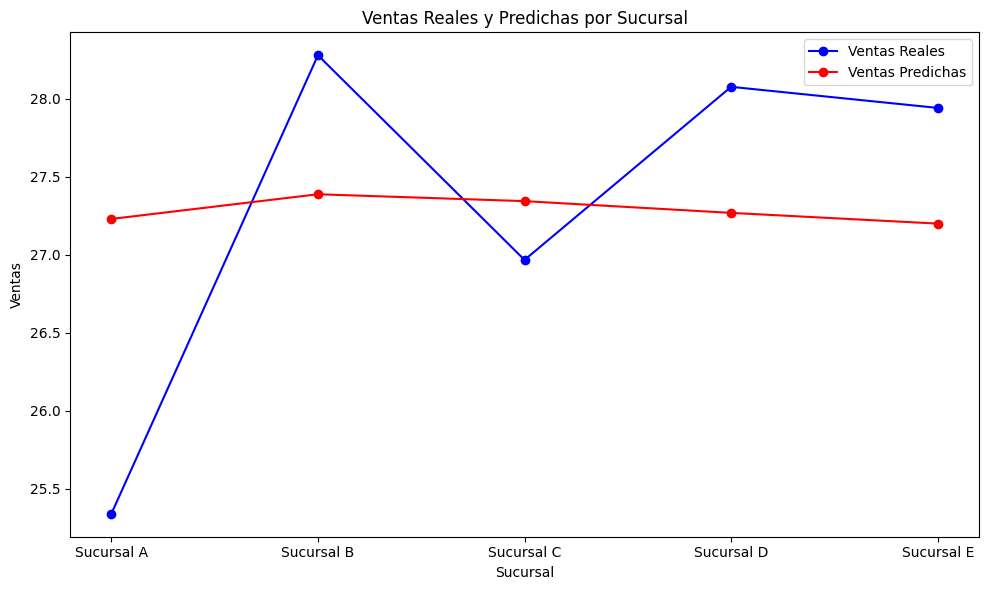

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por sucursal y calcular el promedio de Ventas Reales y Ventas Predichas
grouped_df = df.groupby('BranchName', as_index=False).agg({
    'MonthlySales': 'mean',
    'PredictedSales': 'mean'
})

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar las líneas
ax.plot(grouped_df['BranchName'], grouped_df['MonthlySales'], marker='o', linestyle='-', color='blue', label='Ventas Reales')
ax.plot(grouped_df['BranchName'], grouped_df['PredictedSales'], marker='o', linestyle='-', color='red', label='Ventas Predichas')

# Etiquetas y título
ax.set_xlabel('Sucursal')
ax.set_ylabel('Ventas')
ax.set_title('Ventas Reales y Predichas por Sucursal')
ax.legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Guarda los datos

In [ ]:
# Guardar el archivo CSV con los valores formateados
df.to_csv('/content/retail_predictions_formatted.csv', index=False)

**CLUSTERING**

Realizar el clustering k-means

In [ ]:
from sklearn.cluster import KMeans

# Seleccionar columnas relevantes para el clustering
data_clustering = df[['MonthlySales', 'MonthlyCosts', 'CustomerSatisfaction']].dropna()

# Aplicar el algoritmo K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering)

# Ver los resultados
data_clustering.head()

,MonthlySales,MonthlyCosts,CustomerSatisfaction,Cluster
0,"16,273,483.90","10,222,710.34",3.70,0
1,"15,673,728.55","10,939,110.14",3.70,0
2,"8,055,368.53","5,309,138.04",4.30,0
3,"38,629,163.00","28,549,918.25",3.50,1
4,"29,697,899.46","24,830,148.16",3.00,2


Visualizar los clusters

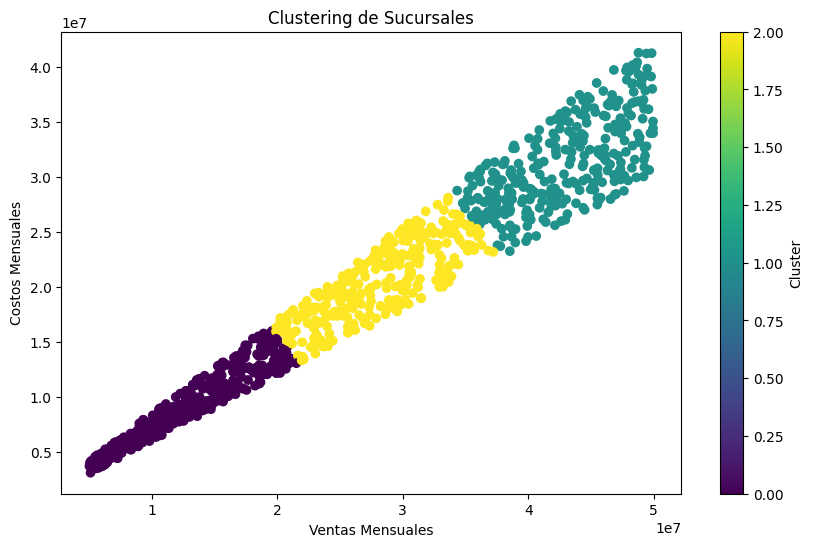

In [ ]:
# Gráfico de dispersión para ver los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_clustering['MonthlySales'], data_clustering['MonthlyCosts'], c=data_clustering['Cluster'], cmap='viridis')
plt.title('Clustering de Sucursales')
plt.xlabel('Ventas Mensuales')
plt.ylabel('Costos Mensuales')
plt.colorbar(label='Cluster')
plt.show()

Guardar datos



In [ ]:
# Guardar los resultados en un archivo CSV
data_clustering.to_csv('/content/retail_clusters.csv', index=False)